In [83]:
from torchvision import datasets,transforms
from torch.utils.data import DataLoader,Subset
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [91]:
device = ("cuda" if torch.cuda.is_available() == True else "cpu")
print(device)

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

x_train = torch.rand(32,3,224,224).to(device)

x = datasets.ImageFolder(r"C:\Users\sarma\OneDrive\Desktop\Git work\Datasets\PetImages",transform=transform)
indice = torch.arange(1000)

x_part = Subset(x,indice)
y_train = DataLoader(x_part,batch_size=32,shuffle=True)

images1,labels1 = next(iter(y_train))
y_train = images1.to(device)

y_train.clone().detach().requires_grad_(True).to(device)
print(y_train.shape,x_train.shape)

cuda
torch.Size([32, 3, 224, 224]) torch.Size([32, 3, 224, 224])


In [85]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(3,64,7,2),
                                    nn.ReLU(),
                                    nn.MaxPool2d(2,2),
                                    nn.Conv2d(64,128,3,1),
                                    nn.ReLU(),
                                    nn.MaxPool2d(2,2),
                                    )
        
        self.layer2 = nn.Sequential(nn.Flatten(),
                                    nn.Linear(128*26*26,256),
                                    nn.ReLU(),
                                    nn.Linear(256,512),
                                    nn.ReLU(),
                                    nn.Linear(512,1024),
                                    nn.Linear(1024,224*224)
                                    )
        
    def forward(self,x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x
    

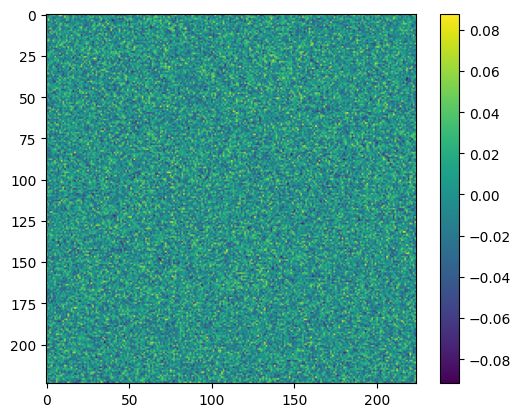

torch.Size([1, 50176])


In [86]:


model = CNN().to(device)

img = images[0].unsqueeze(0).to(device)
a = model.forward(img)
plt.imshow(a.reshape(224,224).cpu().detach().numpy())
plt.colorbar()
plt.show()
print(a.shape)

In [92]:
model.train()
epochs= 5
batch_size = 32
l = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)
for e in range(epochs):
    for i in range(0 , len(x_train), batch_size):
        optimizer.zero_grad()
        x_batch = x_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        output = model.forward(x_batch)
        loss = l(output,y_batch)
        loss.backward()
        optimizer.step()



C:\Users\sarma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([32, 3, 224, 224])) that is different to the input size (torch.Size([32, 50176])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (50176) must match the size of tensor b (224) at non-singleton dimension 3

tensor([[[0.9412, 0.9490, 0.9451,  ..., 0.4863, 0.3686, 0.3608],
         [0.9137, 0.9294, 0.9294,  ..., 0.4980, 0.3725, 0.3490],
         [0.8471, 0.8588, 0.8667,  ..., 0.5176, 0.3686, 0.3176],
         ...,
         [0.7569, 0.7804, 0.7882,  ..., 0.9882, 0.9882, 0.9882],
         [0.6157, 0.6510, 0.6941,  ..., 0.9922, 0.9961, 0.9882],
         [0.6039, 0.6275, 0.6588,  ..., 0.9922, 0.9961, 0.9882]],

        [[0.8314, 0.8431, 0.8471,  ..., 0.4980, 0.4235, 0.4157],
         [0.8314, 0.8510, 0.8549,  ..., 0.5059, 0.4235, 0.4039],
         [0.8039, 0.8118, 0.8235,  ..., 0.5098, 0.4078, 0.3686],
         ...,
         [0.7216, 0.7412, 0.7490,  ..., 0.9882, 0.9882, 0.9882],
         [0.5804, 0.6157, 0.6549,  ..., 0.9922, 0.9961, 0.9882],
         [0.5686, 0.5961, 0.6196,  ..., 0.9922, 0.9961, 0.9882]],

        [[0.7608, 0.7647, 0.7608,  ..., 0.4275, 0.3569, 0.3490],
         [0.7608, 0.7765, 0.7725,  ..., 0.4353, 0.3529, 0.3373],
         [0.7333, 0.7451, 0.7490,  ..., 0.4353, 0.3294, 0.

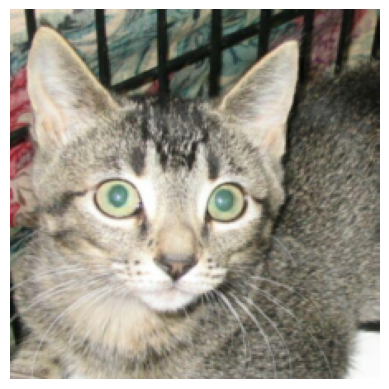

In [ ]:
images,labels = next(iter(y_train))

img = images[0]
print(img)
print(labels)
print(img.shape)

plt.imshow(img.permute(1,2,0).numpy())
plt.axis("off")
plt.show()